In [24]:
pwd

'C:\\Users\\10\\Desktop\\python'

In [25]:
import numpy as np # 숫자
import pandas as pd # 데이터 분석
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화
%matplotlib inline 
# 라인안에 그래프넣는 코드

# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore') 

# 1. 데이터 로드 및 확인

In [26]:
# 데이터 로드
titanic_df = pd.read_csv('./titanic_train.csv') # . 이 2개 있다면 상위폴더로 올라가라 . 한개는 같은폴더

# 데이터 확인
print(titanic_df.shape)
titanic_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Passengerid : 탑승자 데이터 일련번호
* survived : 생존 여부, 0=사망, 1=생존
* Pclass : 티켓의 선실 등급, 1=일등석, 2=이등석, 3=삼등석
* sex : 탑승자 성별
* name : 탑승자 이름
* Age : 탑승자 나이
* sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
* parch : 같이 탑승한 부모님 또는 어린이 인원수
* ticket : 티켓 번호
* fare : 요금
* cabin : 선실 번호
* embarked : 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [27]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [28]:
# 컬럼별 null값 확인 / isnull 로 null 값을 찾고 sum을 해주면 null값의 총 개수가 나온다
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### NULL 컬럼들에 대한 처리

In [29]:
# 나이는 전체 평균 값으로 채운다.
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

# 선실은 N으로 채운다.
titanic_df['Cabin'].fillna('N', inplace=True)

# 정착지는 N으로 채운다.
titanic_df['Embarked'].fillna('N', inplace=True)

In [30]:
# 다시 컬럼별 null값 확인
print('전체 데이터 세트 Null 값 갯수: ','\n', titanic_df.isnull().sum())

전체 데이터 세트 Null 값 갯수:  
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [31]:
print('데이터 세트 Null 값 갯수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


### 컬럼별 데이터 분포 확인

In [32]:
# 성별 승객 수
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [33]:
import pandas as pd

# 최대 줄 수 설정
pd.set_option('display.max_rows', 200)

In [34]:
# 선실 별 승객 수
titanic_df['Cabin'].value_counts()

N                  687
B96 B98              4
C23 C25 C27          4
G6                   4
E101                 3
D                    3
C22 C26              3
F2                   3
F33                  3
C93                  2
E44                  2
B18                  2
F4                   2
D26                  2
C124                 2
D33                  2
C68                  2
C78                  2
C123                 2
E24                  2
F G73                2
E33                  2
B35                  2
C65                  2
C83                  2
B51 B53 B55          2
B49                  2
C92                  2
C52                  2
D35                  2
B77                  2
B58 B60              2
E67                  2
C125                 2
D20                  2
B57 B59 B63 B66      2
B20                  2
D36                  2
E25                  2
B5                   2
B22                  2
E8                   2
E121                 2
D17        

In [35]:
# 정착지 별 승객 수
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [36]:
# 승객 별 선실
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

print(titanic_df['Cabin'])

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object


In [37]:
# 선실 별 승객 수
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [38]:
# 성별 생존자 수(1:생존, 0:사망)
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

# 2. 데이터 시각화

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

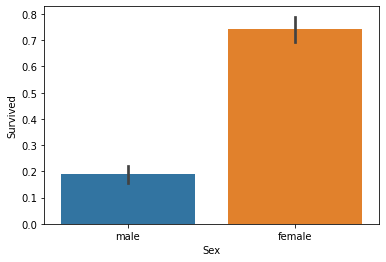

In [39]:
# 씨본은 데이터프레임과 x,y를 넣어주면 알아서 컬럼을 찾아서 그래프를 그려준다.
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

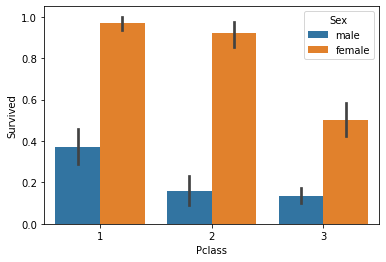

In [40]:
# hue 값 기준으로 구분해서 보여준다.
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

# 3. 데이터 전처리

In [41]:
# age 범위에 따라 카테고리화하는 함수. 
# 입력값으로 'Age' 컬럼값을 받아서 해당하는 카테고리 반환
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

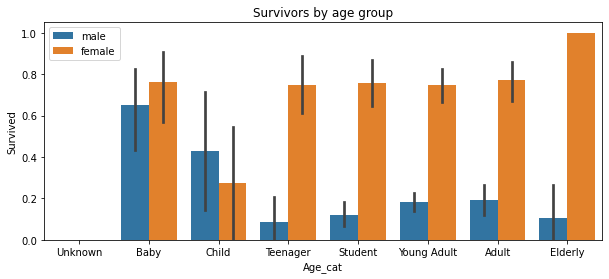

In [42]:
# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10, 4))
plt.title('Survivors by age group')

# X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# 나이에 따른 카테고리화
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

# 나이 카테고리 그래프 그리기
ax = sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)

# 범례 위치  
ax.legend(loc='upper left')

In [69]:
# titanic_df.drop('Age_cat', axis=1, inplace=True)

In [70]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,Young Adult


### 'Cabin', 'Sex', 'Embarked' 컬럼들 - 레이블 인코딩 수행

['컴퓨터', '책상', '의자'] => [1, 2, 3]

In [27]:
from sklearn import preprocessing

# 데이터프레임이 인자로 들어가면, 특정 컬럼들을 레이블 인코딩 해주는 함수
def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


### 전처리 함수로 데이터 전처리

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [71]:
# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [73]:
# 원본 데이터를 재로딩 하고, feature 데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('./titanic_train.csv')

# X, y 데이터프레임 분리
y_titanic_df = titanic_df['Survived']   #레이블
X_titanic_df = titanic_df.drop('Survived', axis=1) # 피처

In [74]:
# X_train 데이터에 전처리 수행
X_titanic_df = transform_features(X_titanic_df)

In [75]:
# train, test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

# 4. 모델 학습 및 비교

In [76]:
# 머신러닝 지도학습 분류기 모델들
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

클래스
1. 라이브러리
2. 타겟값

### DecisionTreeClassifier 학습/예측/평가(기본적인 알고리즘, 성능이 좋지는 않음)

In [84]:
# 객체에다 저장해 가져다 쓴다. (import후에도)/ DecisionTreeClassifier 클래스로 객체 생성 -> 객체로 학습
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf

DecisionTreeClassifier(random_state=11)

In [85]:
#학습

dt_clf.fit(X_train , y_train)

#예측

dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.7877


### RandomForestClassifier 학습/예측/평가(무난한 알고리즘)

In [86]:
rf_clf = RandomForestClassifier(random_state=11)
rf_clf

RandomForestClassifier(random_state=11)

In [83]:
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도:0.8547


### LogisticRegression 학습/예측/평가

In [88]:
lr_clf = LogisticRegression(random_state=11)
lr_clf

LogisticRegression(random_state=11)

In [91]:
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

LogisticRegression 정확도: 0.8492


# 5. 교차 검증 - KFold(k=5)

### (1) 일반 KFold로 교차 검증 - DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    # KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 row 인덱스를 array로 반환
    # enumerate 함수 : 인덱스와 출력값을 동시에 알수있다 , 인덱스 번호와 커렉션의 원소를 tuple형태로 반환 / 인덱스값을 알수 있으므로\
    # 몇번째 반복인지 파악가능
    # ex) for i,p in enumerate(t) : print(i,p)
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):

        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

In [94]:
# dt_clf (DecisionTreeClassifier) 교차 검증 수행
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


### (2) cross_val_score로 교차 검증 - DecisionTreeClassifier

In [96]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
scores

array([0.74301676, 0.7752809 , 0.79213483, 0.78651685, 0.84269663])

In [97]:
# 교차 검증 평균 정확도 확인
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


### (3) GridSearchCV로 교차 검증 + 하이퍼 파라미터 튜닝 - DecisionTreeClassifier

In [102]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
              'min_samples_split':[2, 3, 5], 
              'min_samples_leaf':[1, 5, 8]}
parameters

{'max_depth': [2, 3, 5, 10],
 'min_samples_split': [2, 3, 5],
 'min_samples_leaf': [1, 5, 8]}

In [104]:
# GridSearchCV 객체 생성
grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [105]:
# GridSearchCV 수행
grid_dclf.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [119]:
# GridSearchCV 결과를 데이터프레임 형태로 확인
grid_df = pd.DataFrame(grid_dclf.cv_results_)

# 필요한 칼럼만 확인
grid_df = grid_df[['params', 'mean_test_score', 'rank_test_score', 
                   'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]

grid_df = grid_df.sort_values(by='rank_test_score')
grid_df[:10]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
12,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.799183,1,0.790210,0.790210,0.830986,0.802817,0.781690
13,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.799183,1,0.790210,0.790210,0.830986,0.802817,0.781690
14,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.799183,1,0.790210,0.790210,0.830986,0.802817,0.781690
9,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.799173,4,0.790210,0.797203,0.830986,0.802817,0.774648
10,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.799173,4,0.790210,0.797203,0.830986,0.802817,0.774648
11,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.799173,4,0.790210,0.797203,0.830986,0.802817,0.774648
35,"{'max_depth': 10, 'min_samples_leaf': 8, 'min_...",0.789432,7,0.748252,0.755245,0.838028,0.830986,0.774648
33,"{'max_depth': 10, 'min_samples_leaf': 8, 'min_...",0.789432,7,0.748252,0.755245,0.838028,0.830986,0.774648
23,"{'max_depth': 5, 'min_samples_leaf': 5, 'min_s...",0.789432,7,0.720280,0.783217,0.838028,0.816901,0.788732
22,"{'max_depth': 5, 'min_samples_leaf': 5, 'min_s...",0.789432,7,0.720280,0.783217,0.838028,0.816901,0.788732


In [123]:
# GridSearchCV 수행 결과 확인
print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992


In [125]:
# 최적의 파라미터 찾음

best_dclf = grid_dclf.best_estimator_
best_dclf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=11)

In [130]:
# 테스트 데이터 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)

accuracy

0.8715083798882681